# **Project 2 Report**

Muhammed Ayaan Muhammed Moinuddin

CS658

## **P2-1. Decision Tree**

(a) Develop a decision tree based classifier to classify the 3 different types of Iris (Setosa, Versicolour, and Virginica). 
**Instructions:** When training the decision tree, use 5-fold cross validation. To make your training dataset balanced, pick 10 samples from each Iris type as test set so that the training dataset will contain 40 samples from each Iris type. In total, you will have 120 samples in the training dataset and 30 samples in the test dataset.

In [1]:
# We import the required libraries
from sklearn import datasets  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import StratifiedKFold  
import numpy as np  

# We load the Iris dataset
iris = datasets.load_iris()  # Loading Iris Dataset
X, y = iris.data, iris.target  # Separating the data and target labels

# We initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)  # Creating a decision tree model

# We create a StratifiedKFold object for 5-fold cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Setting up 5-fold cross-validation

# We loop through each fold for cross-validation
for train_index, test_index in skfold.split(X, y):
    test_samples_per_class = 10  # To Ensure we have 10 samples per class in the test set
    test_indices = []  # List to store the selected test indices
    for class_label in np.unique(y):
        class_indices = np.where(y[test_index] == class_label)[0]  # Get indices for each class
        selected_indices = np.random.choice(class_indices, test_samples_per_class, replace=False)  # Randomly select 10 samples for each class
        test_indices.extend(selected_indices)  # Add the selected indices to the test set

    # We use the selected test indices to create the training and test sets
    train_X, test_X = X[train_index], X[test_index[test_indices]]  # Split data into training and test sets
    train_y, test_y = y[train_index], y[test_index[test_indices]]  # Split target labels into training and test sets

    # We train the decision tree classifier on the training data
    dtc.fit(train_X, train_y)

We apply a Decision Tree Classifier to the Iris dataset, employing 5-fold cross-validation with a stratified approach. It loads the dataset, splits it into features (X) and target labels (y), and initializes a Decision Tree Classifier with a fixed random state. The cross-validation process utilizes StratifiedKFold to ensure an equal distribution of test samples per class, randomly selecting 10 samples for each class in the test set. For each fold in the cross-validation loop, the code trains the classifier on the training data.

**(b) Show the confusion matrix of your decision tree. Plot this decision tree.**

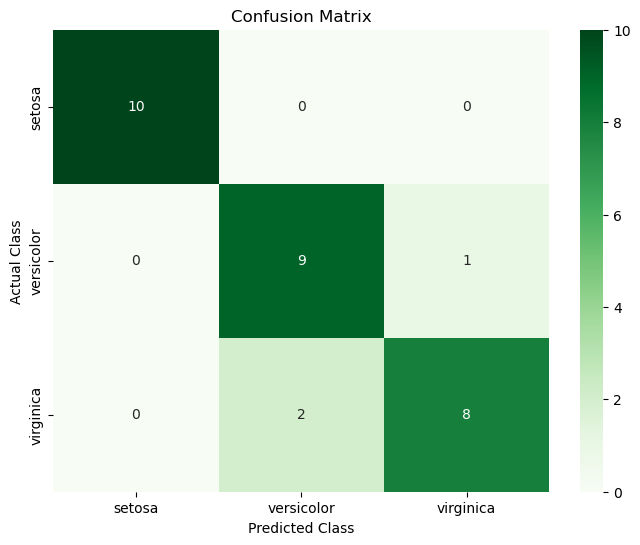

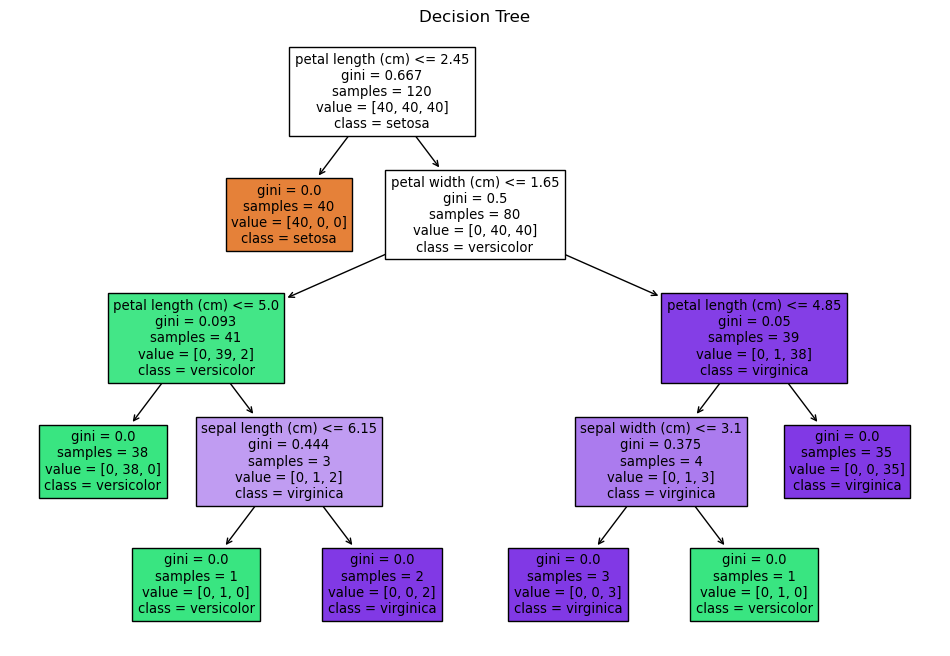

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [2]:
# We import the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# We calculate the confusion matrix
y_pred = dtc.predict(test_X)  # Make predictions on the test dataset
cm = confusion_matrix(test_y, y_pred)  # Calculate the confusion matrix

# We display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# We convert class_names to a list
class_names = list(iris.target_names)

# We plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=iris.feature_names, class_names=class_names)
plt.title("Decision Tree")
plt.show()

# We calculate and display precision, recall, F-measure, and accuracy
report = classification_report(test_y, y_pred, target_names=iris.target_names)
print("Classification Report:\n", report)


We use the above generated decision tree classifier on the Iris dataset. Then we calculate a confusion matrix and presents it as a heatmap for visual interpretation. The decision tree structure is plotted, providing insight into its nodes and leaves. A classification report is generated, offering precise metrics for each class, including precision, recall, F-measure, and accuracy. This comprehensively assesses the classifier's performance on the Iris dataset through visuals and metrics.

**P2-2. Model Overfitting Reproduce the figures in slide 61 in Chapter 3, i.e,**


**(a) Generate the dataset as in slide 56 in Chapter 3:**
 
 **• Class 1: Generate 5000 instances following a Gaussian distribution centered at (10,10) with covariance. And        generate 200 instances following a uniform distribution in a plane defined by the corner points {(0,0), (0,20),(20,0)(20,20)}.**
 
 **• Class 2: Generate 5200 instances following a uniform distribution in the same plane Plot your dataset.**

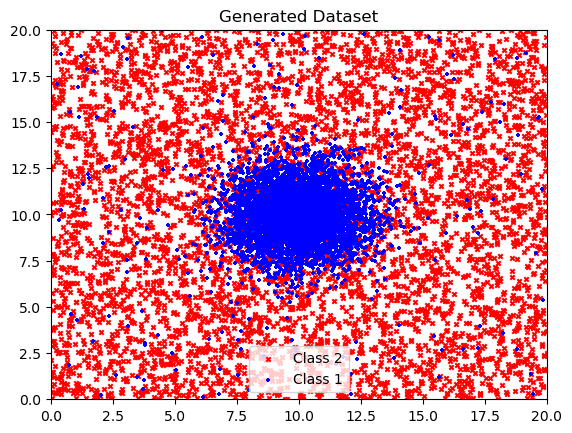

In [3]:
# We import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# We generate Class 1 data
mean_class1 = [10, 10]  # Mean (center) of Class 1 data
cov_class1 = [[2, 0], [0, 2]]  # Covariance matrix for Class 1 data
# We create Class 1 data with a Gaussian distribution (5000 samples)
class1_gaussian_data = np.random.multivariate_normal(mean_class1, cov_class1, 5000)

# We define the corners of the rectangular region for uniform distribution
corner_points = [(0, 0), (0, 20), (20, 0), (20, 20)]

# we create additional Class 1 data with a uniform distribution (200 samples)
class1_uniform_data = np.random.uniform(low=corner_points[0], high=corner_points[3], size=(200, 2))

# We generate Class 2 data
# We create Class 2 data with a uniform distribution (5200 samples)
class2_uniform_data = np.random.uniform(low=[0, 0], high=[20, 20], size=(5200, 2))

# We plot Class 2 (Uniform) data in red 'x' markers
plt.scatter(class2_uniform_data[:, 0], class2_uniform_data[:, 1], label='Class 2', s=10, c='red', marker='x')

# We plot Class 1 (Gaussian and Uniform) data in blue '+' markers
plt.scatter(class1_gaussian_data[:, 0], class1_gaussian_data[:, 1], label='Class 1', s=10, c='blue', marker='+')
plt.scatter(class1_uniform_data[:, 0], class1_uniform_data[:, 1], s=10, c='blue', marker='+') 

plt.xlim(0, 20)  # Set the x-axis limits
plt.ylim(0, 20)  # Set the y-axis limits
plt.legend()  # Show a legend indicating the classes
plt.title('Generated Dataset')
plt.show()  # Display the plot


We generate a dataset using two classes and then visualizes it using scatter plots. Class 1 data is generated with 5000 samples following a Gaussian distribution centered at (10, 10) with a specified covariance matrix. Additionally, 200 instances of Class 1 data are generated with a uniform distribution within a rectangular region defined by the corner points (0,0), (0,20), (20,0), and (20,20). Class 2 data consists of 5200 samples generated with a uniform distribution. We uses blue '+' markers to represent Class 1 (Gaussian and Uniform) data and red 'x' markers to represent Class 2 (Uniform) data. The plot includes labels, axes limits, a legend, and a grid for clarity. The resulting visualization provides an illustration of the generated dataset with distinct classes.

**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

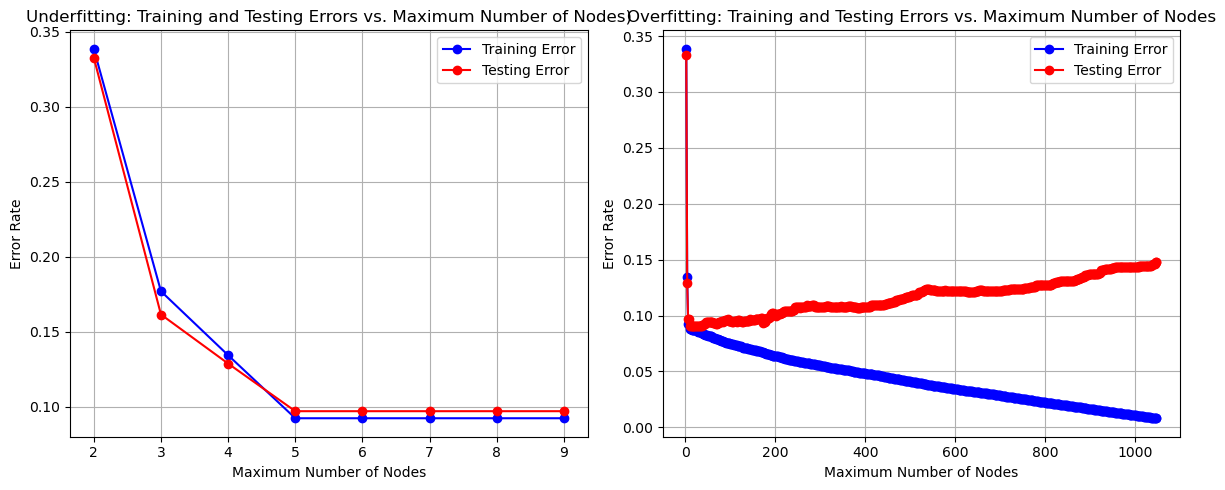

In [4]:
# We import the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# We combine data from both classes
X = np.vstack((class1_gaussian_data, class1_uniform_data, class2_uniform_data))
y = np.hstack((np.ones(len(class1_gaussian_data) + len(class1_uniform_data)), np.zeros(len(class2_uniform_data))))

# We split the dataset into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# We initialize lists to store training and testing errors
training_errors_underfit = []
testing_errors_underfit = []
training_errors_overfit = []
testing_errors_overfit = []

# We trying different numbers of nodes for the decision tree for underfitting
max_nodes_list_underfit = list(range(2, 10))

for max_nodes in max_nodes_list_underfit:
    # We create and train a decision tree classifier for underfitting
    clf_underfit = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=42)
    clf_underfit.fit(X_train, y_train)

    # We calculate training and testing errors for underfitting
    training_error_underfit = 1 - clf_underfit.score(X_train, y_train)
    testing_error_underfit = 1 - clf_underfit.score(X_test, y_test)

    # We append errors to lists for underfitting
    training_errors_underfit.append(training_error_underfit)
    testing_errors_underfit.append(testing_error_underfit)

# We trying different numbers of nodes for the decision tree for overfitting
max_nodes_list_overfit = list(range(2, 1050, 2))

for max_nodes in max_nodes_list_overfit:
    # We create and train a decision tree classifier for overfitting
    clf_overfit = DecisionTreeClassifier(max_leaf_nodes=max_nodes, random_state=42)
    clf_overfit.fit(X_train, y_train)

    # We calculate training and testing errors for overfitting
    training_error_overfit = 1 - clf_overfit.score(X_train, y_train)
    testing_error_overfit = 1 - clf_overfit.score(X_test, y_test)

    # We append errors to lists for overfitting
    training_errors_overfit.append(training_error_overfit)
    testing_errors_overfit.append(testing_error_overfit)

# We create two separate graphs for underfitting and overfitting
plt.figure(figsize=(12, 5))

# We ploting underfitting (training and testing errors)
plt.subplot(1, 2, 1)
plt.plot(max_nodes_list_underfit, training_errors_underfit, marker='o', label='Training Error', color='blue')
plt.plot(max_nodes_list_underfit, testing_errors_underfit, marker='o', label='Testing Error', color='red')
plt.xlabel('Maximum Number of Nodes')
plt.ylabel('Error Rate')
plt.title('Underfitting: Training and Testing Errors vs. Maximum Number of Nodes)')
plt.legend()
plt.grid(True)

# We ploting overfitting (training and testing errors)
plt.subplot(1, 2, 2)
plt.plot(max_nodes_list_overfit, training_errors_overfit, marker='o', label='Training Error', color='blue')
plt.plot(max_nodes_list_overfit, testing_errors_overfit, marker='o', label='Testing Error', color='red')
plt.xlabel('Maximum Number of Nodes')
plt.ylabel('Error Rate')
plt.title('Overfitting: Training and Testing Errors vs. Maximum Number of Nodes')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


We explore the relationship between the number of nodes in a decision tree classifier and underfitting and overfitting in a classification problem. The dataset is constructed by combining data from two classes. Class 1 data includes 5000 instances generated with a Gaussian distribution centered at (10, 10) and 200 instances following a uniform distribution in a specified rectangular region. Class 2 data consists of 5200 samples generated with a uniform distribution.

The dataset is split into training (90%) and test (10%) sets. The code then trains decision tree classifiers with varying numbers of nodes, investigating underfitting and overfitting scenarios. Training and testing errors are calculated for each configuration.

Two separate graphs are generated:
1.The first graph illustrates underfitting by plotting training and testing errors against the maximum number of nodes for the decision tree. It visually demonstrates how increasing the number of nodes in the tree reduces both training and testing errors up to a point where they stabilize.

2.The second graph focuses on overfitting and follows a similar pattern, showing how training and testing errors decrease as the number of nodes increases. However, in the overfitting scenario, training errors continue to decrease while testing errors start to rise, indicating overfitting.

**P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [5]:
# We import the necessary library to fetch the 20 newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups

# We define the categories (topics) we want to load from the dataset.
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# We fetch the training and test subsets of the 20 newsgroups dataset and remove unnecessary content like headers, footers, and quotes.
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# We print the number of documents in the training dataset.
print(f"The training dataset contains {len(newsgroups_train.data)} documents.")

# We print the number of documents in the test dataset.
print(f"The test dataset contains {len(newsgroups_test.data)} documents.")

# We print the number of attributes in the training dataset.
print(f"Number of attributes in the training dataset: {len(newsgroups_train.data[0].split())}")

The training dataset contains 2148 documents.
The test dataset contains 1430 documents.
Number of attributes in the training dataset: 19


We import the necessary library to fetch the 20 newsgroups dataset and defines the specific categories (topics) to be loaded from the dataset. It proceeds to fetch both the training and test subsets of the 20 newsgroups dataset, removing extraneous content like headers, footers, and quotes from the text data. The code then prints the number of documents (messages) present in both the training and test datasets. Furthermore, it calculates and displays the number of attributes in the training dataset, considering attributes as the count of words in that document.

**(b) Develop a decision tree for text documents classification. Show the confusion matrix of your decision tree.**

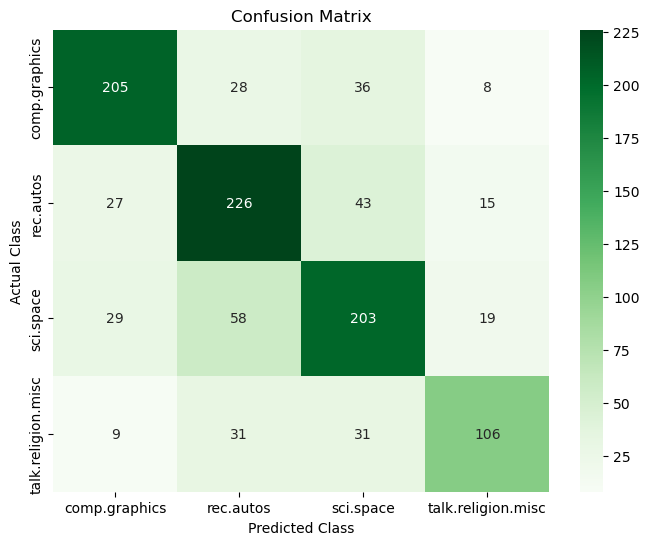

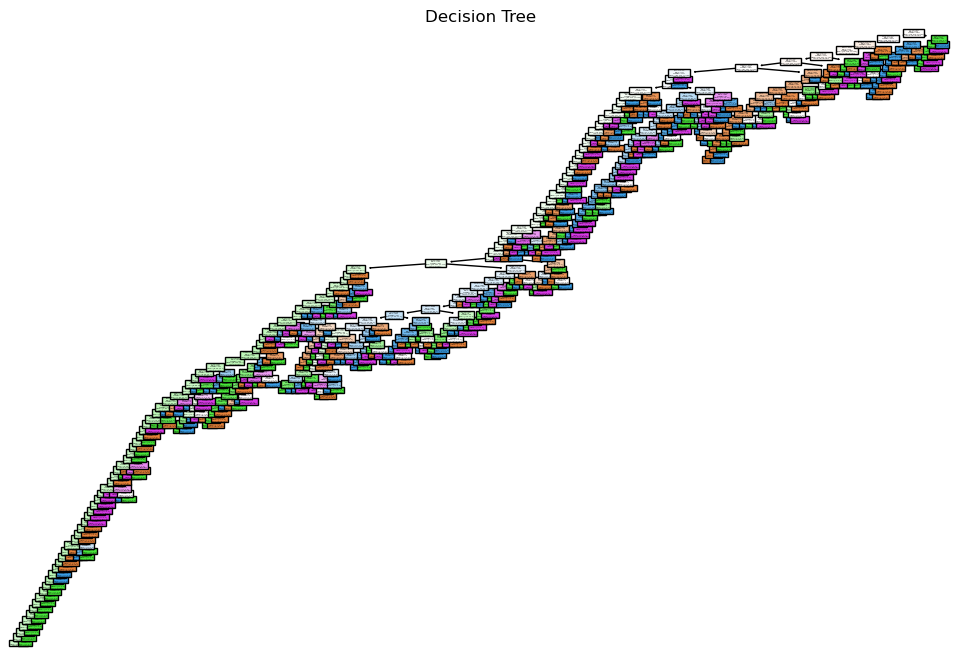

Classification Report:
                     precision    recall  f1-score   support

     comp.graphics       0.76      0.74      0.75       277
         rec.autos       0.66      0.73      0.69       311
         sci.space       0.65      0.66      0.65       309
talk.religion.misc       0.72      0.60      0.65       177

          accuracy                           0.69      1074
         macro avg       0.70      0.68      0.69      1074
      weighted avg       0.69      0.69      0.69      1074



In [6]:
# We import the necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

# We load the 20 newsgroups dataset with specified categories.
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']  # We define categories of interest.
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# We create a TF-IDF vectorizer and transform the text data.
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(newsgroups.data)

# We split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, newsgroups.target, test_size=0.3, random_state=42)

# We initialize the Decision Tree Classifier.
clf = DecisionTreeClassifier(random_state=42)

# We train the decision tree classifier on the training data.
clf.fit(X_train, y_train)

# We calculate the confusion matrix.
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# We display the confusion matrix as a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()

# We convert class_names to a list.
class_names = list(newsgroups.target_names)

# We plot the decision tree.
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out().tolist(), class_names=class_names)
plt.title("Decision Tree")
plt.show()

# We display the classification report.
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)
print("Classification Report:\n", report)


We begin by importing the necessary libraries. We then load the 20 newsgroups dataset with specific categories such as 'rec.autos', 'talk.religion.misc', 'comp.graphics', and 'sci.space.' Using a TF-IDF vectorizer, we transform the text data and split the dataset into training and testing sets. After initializing the Decision Tree Classifier, we train it on the training data. We calculate the confusion matrix and display it as a heatmap for visualization. The class names are converted to a list for further processing. Next, we plot the decision tree and present it graphically. Finally, we generate and display a classification report, which includes precision, recall, F-measure, and support for each class in the dataset.